In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
#display(HTML("<style>.jp-RenderedText { font-family: 'Consolas'; }</style>"))
#display(HTML("<style>.jp-RenderedText, .CodeMirror { font-family: 'Consolas'; }</style>"))

C:\Users\tadje\AppData\Local\Temp\ipykernel_7176\1953496844.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import re
city_list = pd.read_csv('../oecd_city.csv').iloc[1:,0:1]
city_list = city_list.rename(columns = {'#NAME?' : 'name'})
city_list.loc[:,'name'] = city_list['name'].apply( lambda x : x.replace(' ', ''))
city_list['name'] = city_list['name'].str.lower()
country_cities = {}
current_country = None

for ind, row in city_list.iterrows():

    if not re.search(r'\d', row['name']):
        current_country = row['name'].split(':')[1]
        country_cities[current_country] = []

    else:
        if current_country:
            city_name = row['name'].split(':')[1]
            city_name_cleaned = re.sub(r'\s*\([^)]*\)', '', city_name).strip()
            country_cities[current_country].append(city_name_cleaned)

countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt",
    "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France",
    "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau",
    "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel",
    "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "southkorea", "Kosovo",
    "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania",
    "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania",
    "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique",
    "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines",
    "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone",
    "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka",
    "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste",
    "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine",
    "u.a.e", "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City",
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe",\
    'us', 'puertorico', 'türkiye', 'usa',\
    'hongkong'
]


countries = list(map(lambda x : x.replace(' ', ''), countries))
countries = [country.lower() for country in countries]

pattern_updated = '|'.join([f'\\b{country}\\b|{country}$' for country in countries])
pattern2 = r'[A-Za-z]{2}\d{5}$'
pattern3 = r'salem|ny|nevada|ohio|kansascity|chulavista|wichita|oh44483|keshena|andersenafb|goleta|cincinnati'
pattern4 = r'madurai|mumbai|ludhiana|bangalore'
pattern5 = r'medellin'
pattern6 = r'macedonia'
pattern7 = r'charlestown'
pattern8 = r'上海'

def classify_country(x):
    if re.search(pattern3, x, re.IGNORECASE):
        return 'unitedstates'
    elif re.search(pattern4, x, re.IGNORECASE):
        return 'india'
    elif re.search(pattern5, x, re.IGNORECASE):
        return 'colombia'
    elif re.search(pattern6, x, re.IGNORECASE):
        return 'northmacedonia'
    elif re.search(pattern7, x, re.IGNORECASE):
        return 'saintkittsandnevis'
    elif re.search(pattern8, x, re.IGNORECASE):
        return 'china'
    else:
        return x


country_patterns = {country: '|'.join(map(re.escape, cities)) for country, cities in country_cities.items()}

def classify_country2(sentence):
    for country, pattern in country_patterns.items():
        if re.search(pattern, sentence, re.IGNORECASE):
            return country
    return sentence

final_map = {'us' : 'unitedstates', 'usa' : 'unitedstates', 'korea' : 'southkorea', 'tã¼rkiye': 'turkey', 'czechia' : 'czechrepublic',
            'slovakia' :'slovakrepublic', 'türkiye' :'turkey'}

In [3]:
import pandas as pd
import re
#import preprocess2
from sklearn.base import BaseEstimator, TransformerMixin

class MyTrnasformer(BaseEstimator, TransformerMixin):
    def __init__(self, pattern_updated, pattern2, classify_country, classify_country2, final_map, countires):
        self.pattern_updated = pattern_updated
        self.pattern2 = pattern2
        self.classify_country = classify_country
        self.classify_country2 = classify_country2
        self.final_map = final_map
        self.countries = countries

        self.bins = [0, 0.1, 0.15, 0.25, 0.35, 0.49, 1.0]
        self.labels = [1, 2, 3, 4, 5, 6]
        self.customer_country_category = None

        self.similar_categories_mapping = {
                'quotation_or_purchase_consultation': 'quotation or purchase consultation',
                'technical consultation': 'technical support',
                'technical': 'technical support',
                'sales': 'sales inquiry'
            }

        self.position_mapping = {
                'ceo/founder': 'CEO/Founder', 'founder': 'CEO/Founder', 'chief executive officer': 'CEO/Founder',
                'ceo/fundador': 'CEO/Founder', 'the big boss': 'CEO/Founder',
                'vice president': 'Vice President', 'vicepresident': 'Vice President', 'vp': 'Vice President',
                'c-level executive': 'C-Level Executive', 'c-levelexecutive': 'C-Level Executive',
                'leadership/executive office/owner': 'C-Level Executive',
                'director': 'Director', 'business unit director': 'Director',
                'associate/analyst': 'Associate/Analyst', 'associate professor': 'Associate/Analyst',
                'assistant professor': 'Associate/Analyst', 'asst prof.': 'Associate/Analyst',
                'entry level': 'Entry Level', 'entrylevel': 'Entry Level',
                'manager': 'Manager', 'gerente': 'Manager',
                'consultant': 'Consultant', 'commercial consultant': 'Consultant',
                'architecture/consult': 'Consultant', 'architect/consultant': 'Consultant',

                'teacher': 'Education Professional', 'educator': 'Education Professional',
                'professor': 'Education Professional', 'physics teacher': 'Education Professional',
                'maths lecturer': 'Education Professional', 'quantitative aptitude faculty': 'Education Professional',
                'english trainer for ielts,toefl,pte,gre,sat exams.': 'Education Professional', 'pgt physics': 'Education Professional',
                'chemistry teacher': 'Education Professional', 'math and physics teacher': 'Education Professional',
                'assistant professor of enlish': 'Education Professional', 'professor of mathematics': 'Education Professional',
                'physics and mathematics teacher': 'Education Professional',
                # 기타 분류
                'other': 'Other', 'others': 'Other', 'not applicable': 'Other', 'no influence': 'Other',
                'other - please specify - cedia association': 'Other',
                'this is a consume display requirement for home purpose.': 'Not Specified',
                'bulgaria': 'Not Specified', 'exhibitiontv': 'Not Specified'
            }

        self.timeline_mapping = {
                # 시간 프레임 관련 값
                'less than 3 months': 'less than 3 months',
                '3 months ~ 6 months': '3 to 6 months',
                '6 months ~ 9 months': '6 to 9 months',
                '9 months ~ 1 year': '9 months to 1 year',
                'more than a year': 'more than a year',
                'less than 6 months': 'less than 6 months',
                '3_months_~_6_months': '3 to 6 months',
                'less_than_3_months': 'less than 3 months',
                '6_months_~_9_months': '6 to 9 months',
                '9_months_~_1_year': '9 months to 1 year',
                'more_than_a_year': 'more than a year',

                # 상황 설명 값
                'quote has been sent to customer.': 'quote sent',
                'client not interested in product..': 'client not interested',
                'being followed up': 'being followed up',
                'update- 7th aug--demo given. customer will confirm next week': 'demo given - follow up',
                'details send': 'details sent',
                'requires detail for tender. no purchase requirement right now.': 'details required for tender',
                'the client is not having any requirement hence closig in system.': 'client has no requirement',
                'discussed with client details mailed.': 'details mailed to client',
                'he is looking for video wall & idb for his office.': 'looking for specific products',
                'details shared': 'details shared',
                'demo to be aligned': 'demo to be scheduled',
                'update- 13th spet--follow up to be done on 15th sept': 'follow up scheduled',
                'partner is already in touch with our rd, orno.': 'partner in touch with representative',
                'rnr': 'no response received',
                'scheduling a meeting': 'meeting scheduled',
                'customer want demo of idb.': 'customer wants demo',
                'already shared quotation through si.': 'quotation shared',
                'quotation shared.': 'quotation shared',
                'duplicate lead': 'duplicate lead',
                'invalid lead': 'invalid lead',
                'demo scheduled for first week feb': 'demo scheduled',
                'forwarded to bdo, being followed up': 'being followed up by business development officer',
                'spoke with custome he want 43" tv': 'customer wants specific product',
                'don’t have budget': 'no budget',
                'client shall get back for exploring demo of idb': 'client will get back regarding demo',
                'already in discussion with partner from bangalore': 'in discussion with partner',
                'require demo price send': 'demo and price inquiry',
                'size not available': 'specific size not available',
                'eol model new model quote requirment after 30 days.': 'end of life model, new model required after 30 days',
                'need to discuss with client in next two months.': 'discussion planned with client',
                'spoken to client, he will check if they need demo and confirm': 'client will confirm about demo',
                '29thsep2021:-no such requirement as of now': 'no requirement as of now',
                'purchase planning after 3 months': 'planning to purchase after 3 months',
                '09-02-2022 requested for boq of requirement': 'bill of quantities requested',
                'converted this lead into opportunity.': 'lead converted into opportunity',
                'demo scheduled for 24th oct': 'demo scheduled',
                'discussed with client. we need to align demo.': 'discussion with client about demo',
                'require demo': 'demo required',
                'client is looking for 86" display with vc solution': 'client looking for specific display with solution',
                'quote sent to customer.': 'quote sent to customer',
                'under discussion': 'under discussion',
                'meeting planned for further discussion': 'meeting planned',
                'customer will come for demo in next week': 'customer will come for demo',
                'he want demo next week': 'demo requested next week',
                'call and discused to custome customer wants demo.': 'customer wants demo, discussed over call',
                'demo planned, will update further status once its completed': 'demo planned and update pending',
                'quote sent, the client is required demo in june': 'quote and demo scheduled in june',
                'will come for the demo': 'client will come for demo',
                'customer has not answering call': 'customer not answering'
            }



    def fit(slef, X, y=None):
        return self

    def transform(self, X, y=None):

        X = X.copy()

        #numeric data - XGBoost는 NA처리 안해도 작동
        float_columns = X.select_dtypes(include=['float', 'int'])
        for name in float_columns:
            X[name].fillna(0, inplace=True)

        #train2.select_dtypes(exclude=["object"])

        #customer_country
        X['customer_country'] = X['customer_country'].str.lower().str.replace(' ', '').str.replace('//', '/')
        X['customer_country'] = X['customer_country'].str.replace(r'/$', '', regex=True)
        X['customer_country'] = X['customer_country'].str.replace(r'^/', '', regex=True)
        X['customer_country'] = X['customer_country'].fillna('Undefined')
        X['customer_country'] = X['customer_country'].apply(lambda x: re.search(self.pattern_updated, x, re.IGNORECASE).group() if re.search(self.pattern_updated, x, re.IGNORECASE) else x)
        X['customer_country'] = X['customer_country'].apply(lambda x: 'unitedstates' if re.search(self.pattern2, x) else x)
        X['customer_country'] = X['customer_country'].apply(self.classify_country)
        X['customer_country'] = X['customer_country'].apply(self.classify_country2)
        X['customer_country'] = X['customer_country'].apply(lambda x: self.final_map[x] if x in self.final_map.keys() else x)
        X['customer_country'] = X['customer_country'].apply(lambda x: x if x in self.countries else 'Undefined')

        #inquiry_type
        X['inquiry_type'] = X['inquiry_type'].str.lower()
        category_counts = X['inquiry_type'].value_counts()
        categories_to_remove = category_counts[category_counts <= 12].index
        X.loc[X['inquiry_type'].isin(categories_to_remove), 'inquiry_type'] = 'other'
        similar_categories = ['others', 'other_', 'etc.']
        X['inquiry_type'].replace(similar_categories, 'other', inplace=True)
        X['inquiry_type'] = X['inquiry_type'].replace(self.similar_categories_mapping)
        X['inquiry_type'].fillna('Undefined', inplace=True)

        #customer_position
        X['customer_position'] = X['customer_position'].replace(self.position_mapping)
        X['customer_position'] = X['customer_position'].str.lower()
        category_counts = X['customer_position'].value_counts()
        categories_to_remove = category_counts[category_counts <= 30].index
        X.loc[X['customer_position'].isin(categories_to_remove), 'customer_position'] = 'other'


        #expected_timeline
        X['expected_timeline'] = X['expected_timeline'].replace(self.timeline_mapping)
        X['expected_timeline'].fillna('undefined', inplace=True)
        X['expected_timeline'] = X['expected_timeline'].str.lower().str.replace('_', '')
        X['expected_timeline'] = X['expected_timeline'].str.lower().str.replace('.', '')
        X['expected_timeline'] = X['expected_timeline'].str.lower().str.replace(' ', '')
        category_counts = X['expected_timeline'].value_counts()
        categories_to_remove = category_counts[category_counts <= 22].index
        X.loc[X['expected_timeline'].isin(categories_to_remove), 'expected_timeline'] = 'etc'

        #etc
        X['ver_win_rate_x'].fillna(0, inplace=True)


        #customer_job, business_subarea
        str_cols = ['customer_job', 'business_subarea']
        X[str_cols] = X[str_cols].fillna('undefined')  # null to 'undefined'
        X[str_cols] = X[str_cols].apply(lambda x: x.str.replace(' ', ''))  # remove spaces
        X[str_cols] = X[str_cols].apply(lambda x: x.str.lower())  # lower case

        X[str_cols] = X[str_cols].apply(lambda x: x.str.replace(pat=r'[^a-z0-9]', repl=r'', regex=True))  # remove special characters (case 1. all, including non-eng to eng)
        # X[str_cols] = X[str_cols].apply(lambda x: x.str.replace(pat=r'[^a-z0-9,/]', repl=r'', regex=True))  # remove special characters (case 2. only a few for tokenizing issue)

        X['business_subarea'] = X['business_subarea'].apply(lambda x: 'other' if x in ['others', 'undefined'] else x)

        X['customer_job'] = X['customer_job'].replace(dict.fromkeys(['etc', 'others'], 'other'))


        X['customer_job'] = X['customer_job'].replace('accountexec/manager', 'accountmanagement')
        X['customer_job'] = X['customer_job'].replace('accountspayable', 'accounting')
        specific_values = ['admin', 'administración', 'administration', 'administrative', 'adminisztráció', 'amministrativo',
                           'imagingadministrator', 'itadmin', 'itadministrator', 'networkadministrator', 'pacsadministrator',
                           'platformadministrator', 'systemsadministrator']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'admin' if x in specific_values else x)

        #4.
        X['customer_job'] = X['customer_job'].replace('administrativeassistant', 'adminassistant')

        #5.
        X['customer_job'] = X['customer_job'].replace('advertisingandpromotionsteam', 'advertising')
        X['customer_job'] = X['customer_job'].replace('storepromotions', 'advertising')
        X['customer_job'] = X['customer_job'].replace('tradeshowevent', 'advertising')

        #6.
        specific_values2 = ['architect', 'architect/owner', 'architectassinteriores', 'arquitecto/consultor', 'projectarchitect']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'architect' if x in specific_values2 else x)

        #7.
        specific_values3 = ['artanddesign','arte_e_design', 'arteydiseño','artist,leadonequipmentselection', 'arts_and_design', 'artsanddesign']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'artist' if x in specific_values3 else x)

        #8.
        specific_values4 = ['assistinservingfood', 'serving', 'servingfood', 'servingrobot', 'waiter']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'serving' if x in specific_values4 else x)

        #9.
        specific_values5 = ['a/vprojectmanager', 'avestimator', 'avprojectmanager', 'avtech', 'avtechnician']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'avtechnician' if x in specific_values5 else x)

        #10.
        specific_values6 = ['authorize(youareresponsibleformakingthefinaldecision)', 'purchasingauthority']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'authorizer' if x in specific_values6 else x)

        #11.
        X['customer_job'] = X['customer_job'].replace('publicbidder', 'bidder')

        #12.
        specific_values7 = ['business_development', 'businessdevelopment']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'businessdevelopment' if x in specific_values7 else x)

        #13.
        specific_values8 = ['cctvmonetoring', 'cctvview']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'cctvoperator' if x in specific_values8 else x)

        #14.
        specific_values9 = ['ceo', 'ceo/founder', 'chief', 'clevelexecutive', 'coo', 'decider', 'decisionmaker',
                            'finalapproval', 'head', 'president', 'presidentforsennco', 'thebigboss', 'underboss',
                            'vicepresident', 'vp/gm']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'chief' if x in specific_values9 else x)

        #15.
        specific_values10 = ['chiefeng', 'chiefengineer', 'chiefofengineering']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'chiefengineer' if x in specific_values10 else x)

        #16.
        specific_values11 = ['chirurgien', 'cirugano', 'doctor', 'főorvos',  'profesionaldecirugía', 'surgeryprofessional',
                             'surgeryprofessional\u200b']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'doctor' if x in specific_values11 else x)

        #17.
        specific_values12 = ['contractor', 'cintractor', 'managingcontractor']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'contractor' if x in specific_values12 else x)

        #18.
        specific_values13 = ['consultant', 'consultant,cabinetfabricator', 'consultant/purchaser', 'consultent', 'consulting']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'consultant' if x in specific_values13 else x)

        #19.
        specific_values14 = ['coordinator', 'corporate/office', 'correspondence', 'costaravteam']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'corporate' if x in specific_values14 else x)

        #20.
        specific_values15 = ['contentcreation,eqconsultant', 'creativedirector']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'creator' if x in specific_values15 else x)

        #21.
        specific_values16 = ['design', 'design/build', 'design/purchaser', 'designandprovideequipment', 'designer',
                             'designer,creativetechnologist', 'designer,producer', 'designers', 'designere/budget',
                             'designerpurchaser', 'design/purchaser', 'graphicdesign', 'kreation_und_design',
                             'kreationunddesign', 'művészet_és_design']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'designer' if x in specific_values16 else x)

        #22.
        specific_values17 = ['design/install/training/support', 'designandinstall', 'designandinstallationcompany', 'designer/installer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'designinstaller' if x in specific_values17 else x)

        #23.
        specific_values18 = ['designengineer', 'designer/engineer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'designengineer' if x in specific_values18 else x)

        #24.
        specific_values19 = ['desicionmaker', 'design/decisionmaker', 'generalmanager(decisionmaker)', 'technical/decisionmaker']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'decisionmaker' if x in specific_values19 else x)

        #25.
        specific_values20 = ['designer/pm/gc', 'designer/projectmanager']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'desingpm' if x in specific_values20 else x)

        #26.
        specific_values21 = ['developer', 'developer/property', 'softwaredeveloper']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'developer' if x in specific_values21 else x)

        #27.
        specific_values22 = ['digitaldisplayvssignageneed', 'digitalsignage']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'digitalsignage' if x in specific_values22 else x)

        #28.
        specific_values23 = ['directeurtechnique', 'director', 'director,it', 'directorcomercial',
                             'directorit', 'directorofengineering', 'directoroffinance', 'directorofit',
                             'directoroflodging','directorofoperations', 'directorpurchaser', 'engineeringdirector',
                             'f&bdirectorforbicyclecasino', "i'mdirectingit", 'itdairector',  'itdirector',  'managingdirector',
                             'overseer',  'projectdirector', 'purchasingdirector', 'supervisor', 'technicaldirector']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'director' if x in specific_values23 else x)

        #29.
        specific_values24 = ['distribuidor', 'distributor', 'distributorquotation']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'distributor' if x in specific_values24 else x)

        #30.
        specific_values25 = ['education', 'educator', 'highereducation(college&university)', 'institute&academy']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'educator' if x in specific_values25 else x)

        #31.
        specific_values26 = ['engineer', 'engineering', 'engineering&technical', 'engineering,design,andinstall',
                             'hardwaredesignengineer', 'projectengineer', 'principalengineer', 'seniordesignengineer',
                             'systemengineer', 'systemsengineer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'engineer' if x in specific_values26 else x)

        #32.
        specific_values27 = ['engagementexecutive', 'engineering&technicalexecutive', 'executive', 'execution',
                             'marketingexecutive', 'financeexecutive', 'operationsexecutive', 'principal',  'principalincharge',
                             'salesexecutive']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'executive' if x in specific_values27 else x)

        #33.
        specific_values28 = ['eventmarketing', 'fieldmarketing', 'marketing', 'marketingcoordinator',
                             'marketingoperations', 'productmarketing', 'technicalmarketing']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'marketing' if x in specific_values28 else x)

        #34.
        specific_values29 = ['equipmentandappprovider', 'equipmentcustodian', 'equipmentplanner', 'equipmentselection']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'equipment' if x in specific_values29 else x)

        #35.
        specific_values30 = ['facilitator', 'facilitatorinstallationservices', 'facilities', 'facilitiesandoperations',
                             'facilityadministrator', 'facilitymanager']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'facilitator' if x in specific_values30 else x)

        #36.
        specific_values31 = ['field/outsidesales', 'sale', 'sales', 'salesman', 'salesmanager',
                             'salesoperations', 'technicalsales', 'salesrep', 'salesengineering', 'sellerinstaller',
                             'vendite', 'vertrieb', 'értékesítés']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'sales' if x in specific_values31 else x)

        #37.
        specific_values32 = ['finance', 'finanzas', 'finanzen', 'pénzügy']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'finance' if x in specific_values32 else x)

        #38.
        specific_values33 = ['gc', 'generalcontractor']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'generalcontractor' if x in specific_values33 else x)

        #39.
        specific_values34 = ['genelmüdür', 'generalmanagement', 'generalmanager', 'generalmanagerpurchaser', 'generamanager',
                             'globalleadofproduction','gm', 'gm/partowner']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'generalmanager' if x in specific_values34 else x)

        #40.
        specific_values35 = ['generalmanagerprojectmanager', 'gestión_de_proyectos']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'generalprojectmanager' if x in specific_values35 else x)

        #41.
        specific_values36 = ['hr','human_resources', 'humanresources', 'hrposting']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'humanresource' if x in specific_values36 else x)

        #42.
        specific_values37 = ['healthcare_services', 'healthcareprofessionals', 'healthcareservices', 'mentalhealth']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'healthcare' if x in specific_values37 else x)

        #43.
        specific_values38 = ['helpdesk/desktopservices', 'helpdeskspecialist']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'helpdesk' if x in specific_values38 else x)

        #44.
        specific_values39 = ['implement', 'informatics,touchcapability', 'information_technology', 'informationtechnology',
                             'informationtechnology\u200b', 'it', 'it/software', 'itdepartment', 'ittech', 'itsupport',
                             'itspecialist', 'itintegrator', 'ithardwaretechnician', 'itinformationtechnology', 'officeit']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'it' if x in specific_values39 else x)

        #45.
        specific_values40 = ['installationandpurchaser', 'installer', 'installer/salesrep', 'installer/systemintegrater',
                             'postinstallsupportandservice',  'planningandinstallation', 'systeminstaller']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'install' if x in specific_values40 else x)

        #46.
        specific_values41 = ['integrador', 'integration', 'integrator', 'intergrator', 'si', 'specifier/integrator',
                             'systemdesigner,integrator']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'integrator' if x in specific_values41 else x)

        #47.
        specific_values42 = ['interiordesigner', 'interiorstylist']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'interior' if x in specific_values42 else x)

        #48.
        specific_values43 = ['instructor', 'teacher', 'teaching']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'instructor' if x in specific_values43 else x)

        #49.
        specific_values44 = ['lead', 'leaddesigner', 'leadengineer', 'leader', 'itprojectlead',
                             'projectlead', 'teamlead', 'teamleader']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'leader' if x in specific_values44 else x)

        #50.
        specific_values45 = ['medicalsolutionprovider', 'medicalsolutionprovider\u200b']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'medicalsolutionprovider' if x in specific_values45 else x)

        #51.
        specific_values46 = ['maintenance', 'maintenancesupervisor', 'maintenancetechnician']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'maintenance' if x in specific_values46 else x)

        #52.
        specific_values47 = ['management',  'manager', 'managgere', 'managingemployee', 'managingpartner', 'manger',
                             'officemanager', 'üzemeltetés']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'manager' if x in specific_values47 else x)

        #53.
        specific_values48 = ['manufacturer', 'manufacturingfactory/plant']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'manufacturer' if x in specific_values48 else x)

        #54.
        specific_values49 = ['media_and_communication', 'media_e_comunicazione', 'mediaandcommunication',
                             'mediaandcommunications',  'medios_de_comunicación', 'medien_und_kommunikation',
                             'média_és_kommunikáció']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'mediaandcommunication' if x in specific_values49 else x)

        #55.
        specific_values50 = ['military_and_protective_services', 'militaryandprotectiveservices']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'military' if x in specific_values50 else x)

        #56.
        specific_values51 = ['obtainquotes,processpurchase', 'planner/purchaser', 'purchase', 'purchaseandinstall',
                             'purchasedept', 'purchaser', 'purchaser,itandinstaller', 'purchasers', 'purchasing',
                             'purchasingagent', 'purchasingcoordinator','purchsing']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'purchase' if x in specific_values51 else x)

        #57.
        specific_values52 = ['operaciones', 'operations']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'operation' if x in specific_values52 else x)

        #58.
        specific_values53 = ['operationsmanager', 'opsmgr']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'operationmanager' if x in specific_values53 else x)

        #59.
        specific_values54 = ['product_management', 'productmanagement']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'productmanager' if x in specific_values54 else x)

        #60.
        specific_values55 = ['pm', 'producer/projectmanager', 'program_and_project_management', 'program_and_project_manager',
                             'program_és_projektmenedzsment', 'programandprojectmanagement',  'programm_und_projektmanagement',
                             'programmundprojektmanagement',  'projectcoordinator', 'projectadministrator', 'programdirectors',
                             'projectionmanager', 'projectmanage', 'projectmanager', 'projectmanager/designer',
                             'projectmanager/estimator', 'projectmanager/principal','projectsales/manage',
                             'projektmenedzsment\tprogramandprojectmanagement', 'projectdesigner','projectfacilitator',
                             'projecthead', 'projectrmgmt', 'r&dprojectmanager']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'projectmanager' if x in specific_values55 else x)

        #61.
        specific_values56 =  ['productresearch', 'productresearcher', 'projectresearcher', 'research/install',
                              'researchproductsandprices', 'researchandinstalaltion']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'research' if x in specific_values56 else x)

        #62.
        specific_values57 = ['medicalimagingspecialist', 'profesionalderadiología', 'spécialiste_en_imagerie_médicale']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'medicalimagingspecialist' if x in specific_values57 else x)

        #63.
        specific_values58 = ['proprietário(a)', 'propertyowner', 'ownerrepresentation', 'owningcompany',
                             'ownnermarketingdirector', 'owner/projectmanager', 'businessowner', 'productowner',
                             'buildingowner']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'owner' if x in specific_values58 else x)

        #64.
        specific_values59 = ['partscoordinator', 'buyer,coordinating', 'servicecoordinator']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'coordinator' if x in specific_values59 else x)

        #65.
        specific_values60 = ['procurement', 'procurementspecialist', 'procurment', 'sourcing/procurement']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'procurement' if x in specific_values60 else x)

        #66.
        specific_values61 = ['quality_assurance', 'qualityassurance']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'qualityassurance' if x in specific_values61 else x)

        #67.
        specific_values62 = [ 'quotationcurator',  'quotegathering/proposertoowner', 'quotingproject', 'sourcing',
                             'sourcing&quotingforenduser']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'quotation' if x in specific_values62 else x)

        #68.
        specific_values63 = ['radiology_professional',  'radiologyprofessional']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'radiology' if x in specific_values63 else x)

        #69.
        specific_values64 = ['recommend', 'recommend(yourecommendspecificproductsortechnologiesforthesolution)',
                             'recommendation', 'recommender']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'recommend' if x in specific_values64 else x)

        #70.
        specific_values65 = ['requirementsandbuyer', 'buyer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'buyer' if x in specific_values65 else x)

        #71.
        specific_values66 = ['research&development', 'researchanddevelopement']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'researchanddevelopment' if x in specific_values66 else x)

        #72.
        specific_values67 = ['reseller', 'reseller/integrator', 'technicaladvisor,reseller', 'vendor/reseller']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'reseller' if x in specific_values67 else x)

        #73.
        specific_values68 = ['retailer/installer', 'revendedor']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'retailer' if x in specific_values68 else x)

        #74.
        specific_values69 = ['display', 'displayourproducts', 'restaurantdisplay', 'usingforwindowdisplay']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'display' if x in specific_values69 else x)

        #75.
        specific_values70 = ['energy', 'renewableenergy']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'energy' if x in specific_values70 else x)

        #76.
        specific_values71 = ['changetv', 'replacementtv', 'replacingtv']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'changetv' if x in specific_values71 else x)

        #77.
        specific_values72 = ['signageforanattraction', 'signagemanager', 'signagesubcontractorp/m', 'signcompany',
                             'slidingpicturesofbeautysalon']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'signage' if x in specific_values72 else x)

        #78.
        specific_values73 = ['solutionadvisor', 'solutionengineer', 'solutionprovider', 'solutionsarchitect',
                             'solutionsproviderandspecifier', 'softwaresolution']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'solution' if x in specific_values73 else x)

        #79.
        specific_values74 = ['systemsdesign', 'systemsdesigner']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'systemdesigner' if x in specific_values74 else x)

        #80.
        specific_values75 = ['strategiccommunications', 'strategy&operationsspecialist']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'strategy' if x in specific_values75 else x)

        #81.
        specific_values76 = ['support', 'support/facilitator,designer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'support' if x in specific_values76 else x)

        #82.
        specific_values77 = ['supplier', 'supplierandinstallation']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'supplier' if x in specific_values77 else x)

        #83.
        specific_values78 = ['tech', 'technical', 'technologyconsultant', 'technologydesigner', 'techservice',
                             'avtechnician', 'fixingtv', 'emergingtechnology/innovation']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'tech' if x in specific_values78 else x)

        #84.
        X['customer_job'] = X['customer_job'].replace('tierarzt', 'vat')

        #
        specific_valuess = ['altro', 'egyéb', 'otros', 'n/a', 'nothing', 'norespoxseonphonewilltryagain',
                            'na', 'other', 'otro', 'otro', 'others', 'otherstores', 'requirementclose',
                            'var', 'askingforquoteforclient', 'autres', 'conferenceroom', 'conferencetable', 'entrylevel',
                            'enduser', 'forconfrence', 'hometheater', 'hoteltv', 'hardware', 'infrastructure',
                            'inquirytobuy/contactustest', 'mastermind', 'mainenduseroftheproduct', 'menu', 'mindenes',
                            'need1tv55"edgeled4kuhd', 'needonetv', 'norequirment', 'partofvideowall', 'photos',
                            'primary', 'primaryenduser',  'projectteammember', 'sonstiges', 'stakeholder', 'submittingproposal',
                            'test4', 'tester', 'thepersonwiththecreditcard', 'undefined', 'user', 'videowall', 'weareiniceland']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'other' if x in specific_valuess else x)



        #product_category

                # 1.
        specific2_values = ['videowallsignage', 'ledsignage', 'interactivesignage', 'oledsignage', 'standardsignage',
                            'highbrightnesssignage', 'specialsignage', 'ur640s', 'smarttvsignage', 'ur640', 'uhdsignage',
                            'digitalsignage', 'tvsignage', 'monitorsignagecommercialtv']
        X['product_category'] = X['product_category'].apply(lambda x: 'signage' if x in specific2_values else x)

        # 2.
        specific2_values2 = ['hoteltv', 'hospitaltv', 'commercialtv', 'commercialtvtv', 'htv', '43us660h0sdawz']
        X['product_category'] = X['product_category'].apply(lambda x: 'tv' if x in specific2_values2 else x)

        # 3.
        specific2_values3 = ['pc', 'laptop']
        X['product_category'] = X['product_category'].apply(lambda x: 'pclaptop' if x in specific2_values3 else x)

        # 4.
        specific2_values4 = ['solaress', 'solarsystemac']
        X['product_category'] = X['product_category'].apply(lambda x: 'solar' if x in specific2_values4 else x)

        # 5.
        specific2_values5 = ['solarchiller', 'systemacchiller']
        X['product_category'] = X['product_category'].apply(lambda x: 'chiller' if x in specific2_values5 else x)

        # 6.
        specific2_values6 = ['monitorsignagemoniormonitortv', 'monitorpc', 'moniormonitortvtv', 'computermonitors']
        X['product_category'] = X['product_category'].apply(lambda x: 'monitor' if x in specific2_values6 else x)

        # 7.
        specific2_values7 = ['control', 'highbrightness', 'softwaresolution', 'signagecaresolution', 'technicalsupport',
                             'services', 'salesinquiry', 'solaraircare', 'chilleraircare', 'systemacaircare']
        X['product_category'] = X['product_category'].apply(lambda x: 'support' if x in specific2_values7 else x)

        # 8.
        specific2_values8 = ['medicaldisplay', 'commercialdisplay', 'medicaldisplays', 'led', 'ledallinone', 'fhdseries',
                             'oled']
        X['product_category'] = X['product_category'].apply(lambda x: 'display' if x in specific2_values8 else x)

        # 9.
        specific2_values9 = ['multisplit', 'singlesplit', 'multiinverter', 'alllgvrfsystems', 'multiv5air', 'multivwater5',
                             'multiv5vrf', 'vrfmultisplitsinglesplit', 'vrfmultisplitsinglesplitchiller', 'vrfsinglesplit',
                             'vrfmultisplit', 'ogrzewaniepompyciepa']
        X['product_category'] = X['product_category'].apply(lambda x: 'vrf' if x in specific2_values9 else x)

        # 10.
        specific2_values10 = ['videowall', 'videowallrmk', 'projector', 'video']
        X['product_category'] = X['product_category'].apply(lambda x: 'videoprojector' if x in specific2_values10 else x)

        # 11.
        specific2_values11 = ['heating', 'athermodynamicwaterheater']
        X['product_category'] = X['product_category'].apply(lambda x: 'heater' if x in specific2_values11 else x)

        # 12.
        specific2_values12 = ['idb', 'educationcreateboard']
        X['product_category'] = X['product_category'].apply(lambda x: 'interactivedigitalboard' if x in specific2_values12 else x)

        # 13.
        specific2_values13 = ['lgonequickseries', 'onequickseries', 'lgonequick']
        X['product_category'] = X['product_category'].apply(lambda x: 'onequick' if x in specific2_values13 else x)

        # 14.
        specific2_values14 = ['webos', 'procentric', 'clouddevice']
        X['product_category'] = X['product_category'].apply(lambda x: 'oscloud' if x in specific2_values14 else x)

        # 15.
        specific2_values15 = ['rac', 'tetooucasseteinverter', 'arcondicionadoresidencial', 'residentialairconditioner',
                              'aireacondicionadoresidencial']
        X['product_category'] = X['product_category'].apply(lambda x: 'airconditioner' if x in specific2_values15 else x)

        # 16.
        specific2_values16 = ['robots']
        X['product_category'] = X['product_category'].apply(lambda x: 'robot' if x in specific2_values16 else x)

        # 17.
        specific2_values17 = ['outros', 'otros']
        X['product_category'] = X['product_category'].apply(lambda x: 'other' if x in specific2_values17 else x)

        value_counts = X['product_category'].value_counts()

        #X['product_category'] = X['product_category'].apply(lambda x: 'other' if value_counts[x] < 50 or value_counts[x] == 53 else x)
        X['product_category'] = X['product_category'].apply(lambda x: 'other' if pd.isna(x) or value_counts.get(x, 0) < 50 or value_counts.get(x, 0) == 53 else x)
        return X


In [4]:

df_train = pd.read_csv('../train.csv')
df_test = pd.read_csv('../submission.csv')
transformer = MyTrnasformer(pattern_updated, pattern2, classify_country, classify_country2, final_map, countries)
train_x = transformer.transform(df_train)
test_x = transformer.transform(df_test)

In [5]:
df_all = pd.concat([train_x, test_x])
df_all.isna().sum()

bant_submit                    0
customer_country               0
business_unit                  0
com_reg_ver_win_rate           0
customer_idx                   0
customer_type              45418
enterprise                     0
historical_existing_cnt        0
id_strategic_ver               0
it_strategic_ver               0
idit_strategic_ver             0
customer_job                   0
lead_desc_length               0
inquiry_type                   0
product_category               0
product_subcategory        54542
product_modelname          54779
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline              0
ver_cus                        0
ver_pro                        0
ver_win_rate_x                 0
ver_win_ratio_per_bu           0
business_area              43780
business_subarea               0
lead_owner                     0
is_converted                   0
id                         59299
dtype: int

In [6]:
# customer_country 전처리 뒤에서 80개, count 20개이하는 삭제
category_counts = df_all['customer_country'].value_counts()
categories_to_remove = category_counts[category_counts <= 20].index
df_all.loc[df_all['customer_country'].isin(categories_to_remove), 'customer_country'] = 'undefined'

## customer_type 전처리
similar_categories_mapping = {
    'other': 'undefined',
    'dealerdistributor': 'distributor',
    'commercialenduser': 'enduser',
}

df_all['customer_type'] = df_all['customer_type'].replace(similar_categories_mapping)
category_counts = df_all['customer_type'].value_counts()
categories_to_remove = category_counts[category_counts <= 5].index
df_all.loc[df_all['customer_type'].isin(categories_to_remove), 'customer_type'] = 'undefined'


# customer_job 전처리
similar_categories_mapping = {
    'generalmanager': 'manager',
    'designer': 'artist',
}
df_all['customer_job'] = df_all['customer_job'].replace(similar_categories_mapping)
category_counts = df_all['customer_job'].value_counts()
categories_to_remove = category_counts[category_counts <= 31].index
df_all.loc[df_all['customer_job'].isin(categories_to_remove), 'customer_job'] = 'other'


# product_category 전처리
similar_categories_mapping = {
    'other': 'undefined',
    'laptop': 'pc',
}

df_all['product_category'] = df_all['product_category'].replace(similar_categories_mapping)
category_counts = df_all['product_category'].value_counts()
categories_to_remove = category_counts[category_counts <= 60].index
df_all.loc[df_all['product_category'].isin(categories_to_remove), 'product_category'] = 'undefined'

In [8]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
numerical_features = ['com_reg_ver_win_rate', 'historical_existing_cnt', 'lead_desc_length', 'ver_win_rate_x', 'ver_win_ratio_per_bu']

scaler = MinMaxScaler()
df_all[numerical_features] = power_transformer.fit_transform(df_all[numerical_features])
df_all[numerical_features] = scaler.fit_transform(df_all[numerical_features])


In [9]:
df_all

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,id
0,1.00,philippines,AS,0.910641,32160,End-Customer,Enterprise,0.000000,0.0,0.0,...,lessthan3months,1,0,1.0,0.81828,corporate / office,engineering,0,1,NaN
1,1.00,philippines,AS,0.910641,23122,End-Customer,Enterprise,0.993792,0.0,0.0,...,lessthan3months,1,0,1.0,0.81828,corporate / office,advertising,1,1,NaN
2,1.00,india,AS,0.958692,1755,End-Customer,Enterprise,0.999948,0.0,0.0,...,lessthan3months,1,0,1.0,0.81828,corporate / office,construction,2,1,NaN
3,1.00,india,AS,0.958692,4919,End-Customer,Enterprise,0.000000,0.0,0.0,...,lessthan3months,1,0,1.0,0.81828,corporate / office,itsoftware,3,1,NaN
4,1.00,india,AS,0.958692,17126,Specifier/ Influencer,Enterprise,0.000000,0.0,0.0,...,lessthan3months,0,0,1.0,0.81828,corporate / office,other,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,brazil,AS,0.000000,40292,NaN,Enterprise,0.991357,0.0,0.0,...,undefined,0,0,0.0,0.00000,NaN,other,97,0,13855.0
5267,0.25,unitedstates,IT,0.000000,47466,NaN,Enterprise,0.000000,0.0,0.0,...,undefined,0,0,0.0,0.00000,NaN,other,438,1,7979.0
5268,0.75,brazil,AS,0.000000,46227,Specifier/ Influencer,Enterprise,0.000000,0.0,0.0,...,lessthan3months,0,0,0.0,0.00000,NaN,other,97,0,12887.0
5269,0.00,unitedstates,IT,0.000000,45667,End Customer,SMB,0.000000,0.0,0.0,...,undefined,0,0,0.0,0.00000,NaN,other,429,0,17530.0


In [10]:
df_all.drop(['customer_idx', 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'ver_cus', 'ver_pro',\
             'product_subcategory', 'product_modelname','customer_country.1'], axis=1, inplace=True)

In [11]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [12]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "customer_position",
    "response_corporate",
    "expected_timeline",
    "lead_owner"
]

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

In [13]:
for col in list(df_all.columns):
    train_x[col] = df_all.iloc[:len(df_train)][col]
    test_x[col] = df_all.iloc[len(df_train):][col]

In [14]:
train_x.drop(['customer_idx', 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'ver_cus', 'ver_pro',\
             'product_subcategory', 'product_modelname','customer_country.1', 'id','business_subarea','historical_existing_cnt','ver_win_ratio_per_bu'], axis=1, inplace=True)
test_x.drop(['customer_idx', 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'ver_cus', 'ver_pro',\
             'product_subcategory', 'product_modelname','customer_country.1','business_subarea','historical_existing_cnt','ver_win_ratio_per_bu'], axis=1, inplace=True)

In [15]:
train_x

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_type,enterprise,customer_job,lead_desc_length,inquiry_type,product_category,customer_position,response_corporate,expected_timeline,ver_win_rate_x,business_area,lead_owner,is_converted
0,1.00,49,0,0.910641,5,0,34,0.563208,3,19,5,33,5,1.000000,0,0,1
1,1.00,49,0,0.910641,5,0,24,0.628943,3,19,2,33,5,1.000000,0,1,1
2,1.00,26,0,0.958692,5,0,13,0.547819,2,27,12,21,5,1.000000,0,203,1
3,1.00,26,0,0.958692,5,0,14,0.511256,3,38,2,21,5,1.000000,0,314,1
4,1.00,26,0,0.958692,18,0,8,0.630493,3,19,12,21,5,1.000000,0,424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,50,0,0.000000,4,1,13,0.737665,2,38,5,34,0,0.055373,8,749,0
59295,0.75,13,0,0.769540,18,0,14,0.581517,0,6,13,7,2,0.055373,8,413,0
59296,0.75,48,0,0.769540,18,0,13,0.472048,0,27,5,35,5,0.055373,8,123,0
59297,1.00,48,0,0.769540,20,0,14,0.829669,3,6,11,35,7,0.055373,8,131,0


In [ ]:
train_x.is_converted.value_counts()
54449/4850

11.22659793814433

In [15]:
train_x

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_type,enterprise,customer_job,lead_desc_length,inquiry_type,product_category,customer_position,response_corporate,expected_timeline,ver_win_rate_x,business_area,lead_owner,is_converted
0,1.00,110,0,0.910641,10,0,203,0.563208,3,20,5,33,5,1.000000,0,0,1
1,1.00,110,0,0.910641,10,0,164,0.628943,3,20,2,33,5,1.000000,0,1,1
2,1.00,62,0,0.958692,10,0,100,0.547819,2,30,12,21,5,1.000000,0,203,1
3,1.00,62,0,0.958692,10,0,105,0.511256,3,42,2,21,5,1.000000,0,314,1
4,1.00,62,0,0.958692,29,0,49,0.630493,3,20,12,21,5,1.000000,0,424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,111,0,0.000000,9,1,100,0.737665,2,42,5,34,0,0.055373,8,749,0
59295,0.75,30,0,0.769540,29,0,105,0.581517,0,6,13,7,2,0.055373,8,413,0
59296,0.75,109,0,0.769540,29,0,100,0.472048,0,30,5,35,5,0.055373,8,123,0
59297,1.00,109,0,0.769540,33,0,105,0.829669,3,6,11,35,7,0.055373,8,131,0


In [23]:

x_train, x_val, y_train, y_val = train_test_split(
    train_x.drop("is_converted", axis=1),
    train_x["is_converted"],
    test_size=0.1,
    stratify = train_x["is_converted"],
    shuffle=True,
    random_state=230,
)
y_train.value_counts()

is_converted
0    49004
1     4365
Name: count, dtype: int64

In [24]:
49004/4365

11.226575028636884

In [21]:
 49026/4343

11.288510246373475

In [16]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bant_submit           59299 non-null  float64
 1   customer_country      59299 non-null  int64  
 2   business_unit         59299 non-null  int64  
 3   com_reg_ver_win_rate  59299 non-null  float64
 4   customer_type         59299 non-null  int64  
 5   enterprise            59299 non-null  int64  
 6   customer_job          59299 non-null  int64  
 7   lead_desc_length      59299 non-null  float64
 8   inquiry_type          59299 non-null  int64  
 9   product_category      59299 non-null  int64  
 10  customer_position     59299 non-null  int64  
 11  response_corporate    59299 non-null  int64  
 12  expected_timeline     59299 non-null  int64  
 13  ver_win_rate_x        59299 non-null  float64
 14  business_area         59299 non-null  int64  
 15  lead_owner         

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, f1_score

x_train, x_val, y_train, y_val = train_test_split(
    train_x.drop("is_converted", axis=1),
    train_x["is_converted"],
    test_size=0.1,
    stratify = train_x["is_converted"],
    shuffle=True,
    random_state=230,
)

xgb_clf = xgb.XGBClassifier(tree_method = "hist",  device='cuda', random_state=123)

# 조정할 하이퍼파라미터 그리드 정의
param_grid = {
    'min_child_weight' : [1, 2],
    'max_depth': [6, 7],
    'learning_rate': [0.1, 0.15, 0.2],
    'n_estimators': [500, 600, 650],
    'subsample': [0.7, 0.9],
    'alpha' : [2, 4],
    'lambda' : [0.3, 0.5, 0.6],
    'gamma' : [0.5],
    'scale_pos_weight' : [11.2265],
}

# F1 점수와 리콜을 동시에 고려하는 사용자 정의 스코어 함수
#def f1_recall_score(y_true, y_pred):
#    f1 = f1_score(y_true, y_pred)
#    recall = recall_score(y_true, y_pred)
#    return (f1 + recall) / 2

# 사용자 정의 스코어 함수를 만들기 위한 make_scorer 사용
#scorer = make_scorer(f1_recall_score)

# GridSearchCV 초기화
grid_search4 = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=12)

# 그리드 검색 실행
grid_search4.fit(x_train, y_train)

# 최적의 파라미터와 점수 출력
print("Best Parameters:", grid_search4.best_params_)
print("Best Score:", grid_search4.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'alpha': 2, 'gamma': 0.5, 'lambda': 0.6, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 650, 'scale_pos_weight': 11.2265, 'subsample': 0.9}
Best Score: 0.6634835926233393


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
best_model4 = grid_search4.best_estimator_
y_pred4 = best_model4.predict(x_val)
print(f1_score(y_val, y_pred4))
print(accuracy_score(y_val, y_pred4))
print(precision_score(y_val, y_pred4))
print(recall_score(y_val, y_pred4))

0.6854545454545454
0.9416526138279933
0.6130081300813008
0.777319587628866


C:\Users\tadje\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:37:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


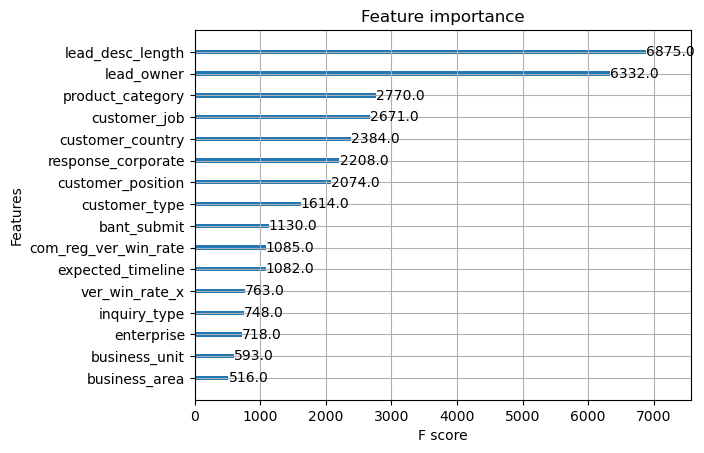

In [26]:
from xgboost import plot_importance
ax = plot_importance(best_model4)

In [ ]:
from joblib import dump

# 모델 저장
dump(best_model4, 'best_model4_ver1.joblib')

['best_model4_ver1.joblib']

In [20]:
x_test = test_x.drop(["is_converted", "id"], axis=1)
# 테스트 데이터셋에 대한 예측 수행
y_pred4 = best_model4.predict(x_test)
#df_sub = pd.read_csv("../submission.csv")
#df_sub["is_converted"] = y_pred3
#df_sub.to_csv("submission0213_1.csv", index=False)
y_pred4.sum() #기본 임계값

987

In [23]:
y_pred_proba = best_model4.predict_proba(x_test)[:, 1]  # 클래스 1에 대한 확률

# 사용자 정의 임계값 설정
threshold = 0.3  # 예시로 0.7을 사용

# 임계값을 적용하여 예측값 계산
y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
y_pred_custom_threshold.sum()

1288

In [22]:
import numpy as np
y_pred_proba = best_model4.predict_proba(x_test)[:, 1]  # 클래스 1에 대한 확률

# 사용자 정의 임계값 설정
threshold = 0.25  # 예시로 0.7을 사용

# 임계값을 적용하여 예측값 계산
y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
y_pred_custom_threshold.sum()

1413

In [24]:
y_pred_proba = best_model4.predict_proba(x_test)[:, 1]  # 클래스 1에 대한 확률

# 사용자 정의 임계값 설정
threshold = 0.08  

# 임계값을 적용하여 예측값 계산
y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
y_pred_custom_threshold.sum()

1925

In [28]:
y_pred_custom_threshold.sum()

1925

In [29]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = y_pred_custom_threshold
df_sub.to_csv("submission3_0219_008.csv", index=False)

In [ ]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = y_pred_custom_threshold
df_sub.to_csv("submission0217_2_025.csv", index=False)

In [ ]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = y_pred_custom_threshold
df_sub.to_csv("submission0217_2_03.csv", index=False)

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(1, 2, figsize=(16, 7)) # 1행 2열의 서브플롯 생성, 크기 조정

plot_importance(best_model3, ax=ax[0], title='Feature importance of best_model3')
plot_importance(best_model4, ax=ax[1], title='Feature importance of best_model4')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, f1_score

x_train, x_val, y_train, y_val = train_test_split(
    train_x.drop("is_converted", axis=1),
    train_x["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230,
)

xgb_clf = xgb.XGBClassifier(tree_method = "hist",  device='cuda', random_state=123)

# 조정할 하이퍼파라미터 그리드 정의
param_grid = {
    'min_child_weight' : [0.2, 0.3],
    'max_depth': [5, 6],
    'learning_rate': [0.1, 0.15, 0.2],
    'n_estimators': [400, 500, 550],
    'subsample': [0.8, 0.9],
    'alpha' : [3],
    'lambda' : [0.4],
    'gamma' : [0.5],
    'scale_pos_weight' : [11.2265],
}

# F1 점수와 리콜을 동시에 고려하는 사용자 정의 스코어 함수
#def f1_recall_score(y_true, y_pred):
#    f1 = f1_score(y_true, y_pred)
#    recall = recall_score(y_true, y_pred)
#    return (f1 + recall) / 2

# 사용자 정의 스코어 함수를 만들기 위한 make_scorer 사용
#scorer = make_scorer(f1_recall_score)

# GridSearchCV 초기화
grid_search5 = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=12)

# 그리드 검색 실행
grid_search5.fit(x_train, y_train)

# 최적의 파라미터와 점수 출력
print("Best Parameters:", grid_search5.best_params_)
print("Best Score:", grid_search5.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'alpha': 3, 'gamma': 0.5, 'lambda': 0.4, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 0.3, 'n_estimators': 500, 'scale_pos_weight': 11.2265, 'subsample': 0.9}
Best Score: 0.6485287321668197


In [45]:
best_model5 = grid_search5.best_estimator_
y_pred5 = best_model5.predict(x_val)
print(f1_score(y_val, y_pred5))
print(accuracy_score(y_val, y_pred5))
print(precision_score(y_val, y_pred5))
print(recall_score(y_val, y_pred5))

0.6869983948635633
0.9342327150084317
0.5791610284167794
0.8441814595660749


In [46]:
x_test = test_x.drop(["is_converted", "id"], axis=1)
# 테스트 데이터셋에 대한 예측 수행
y_pred5 = best_model5.predict(x_test)
#df_sub = pd.read_csv("../submission.csv")
#df_sub["is_converted"] = y_pred3
#df_sub.to_csv("submission0213_1.csv", index=False)
y_pred5.sum() #기본 임계값

1096

In [50]:
import numpy as np
y_pred_proba = best_model5.predict_proba(x_test)[:, 1]  # 클래스 1에 대한 확률

# 사용자 정의 임계값 설정
threshold = 0.1  # 예시로 0.7을 사용

# 임계값을 적용하여 예측값 계산
y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
y_pred_custom_threshold.sum()

1907

In [ ]:
from joblib import dump

# 모델 저장
dump(best_model5, 'best_model_0219_1_.joblib')

In [51]:
df_all

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_type,enterprise,historical_existing_cnt,customer_job,lead_desc_length,inquiry_type,...,customer_position,response_corporate,expected_timeline,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,id
0,1.00,110,0,0.910641,10,0,0.000000,203,0.563208,3,...,5,33,5,1.0,0.81828,0,28,0,1,NaN
1,1.00,110,0,0.910641,10,0,0.993792,164,0.628943,3,...,2,33,5,1.0,0.81828,0,0,1,1,NaN
2,1.00,62,0,0.958692,10,0,0.999948,100,0.547819,2,...,12,21,5,1.0,0.81828,0,16,203,1,NaN
3,1.00,62,0,0.958692,10,0,0.000000,105,0.511256,3,...,2,21,5,1.0,0.81828,0,47,314,1,NaN
4,1.00,62,0,0.958692,29,0,0.000000,49,0.630493,3,...,12,21,5,1.0,0.81828,0,61,424,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,20,0,0.000000,33,0,0.991357,232,0.234610,3,...,0,43,8,0.0,0.00000,6,61,1036,0,13855.0
5267,0.25,146,3,0.000000,33,0,0.000000,179,0.702056,3,...,10,50,8,0.0,0.00000,6,61,467,1,7979.0
5268,0.75,20,0,0.000000,29,0,0.000000,105,0.492924,0,...,9,43,5,0.0,0.00000,6,61,1036,0,12887.0
5269,0.00,146,3,0.000000,9,1,0.000000,179,0.118744,0,...,10,12,8,0.0,0.00000,6,61,457,0,17530.0
